In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive  
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
df= pd.read_csv('/content/drive/MyDrive/Amazon recommendation system/ratings_Beauty.csv')
df

df.dropna()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [6]:
df.ProductId.value_counts().sort_values(ascending=False)

B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B00JJGS97W       1
B002TN8DRI       1
B00J51GUR2       1
B0082MS4AG       1
B0032CLY7Q       1
Name: ProductId, Length: 249274, dtype: int64

In [7]:
popular_products=pd.DataFrame(df.groupby('ProductId')['Rating'].count().sort_values(ascending=False))
popular_products.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


#Finding Top 10 popular products

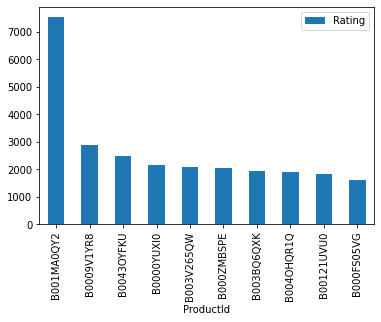

In [8]:
#Top 10  popular product with high count of ratings
popular_products.head(10).plot(kind='bar')

#Model based Collaborative Filtering 

Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

In [9]:
product_ratings=df.head(10000)
rating_utility_matrix=product_ratings.pivot_table(values='Rating',index='ProductId',columns='UserId',fill_value=0)
rating_utility_matrix

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,A0870685EP51H0X8LFFU,A100AM334XZS3V,A100GYE1W4OXZ8,A100UD67AHFODS,A101GN97A47S1P,A10205RFE66H1R,A1029IITTU8289,A102LFZGD4MJXV,A1034GEUA8ZVFR,A103BJIOJSDJL1,A103FNP25GNMPH,A103PIRYKWQKR7,A103QH6R6A4FT1,A103QUZ016BQNJ,A103U3KR4L2ZXT,A1041053SID37WN8GTT8,A104CBA4A4HYOF,A104D62WJII6KP,A105C73RQ4YGCW,A1087Y8RJ4D422,A108HJD2ESJXUY,A108JE8E0CK1G3,A108LMMYNGL89M,A108V4O9Z78DB5,A10BXWWQPUDNCW,A10BZV61MNLBZD,A10C03UY4QEHJT,A10FEMX3ROQPTD,A10FXC2G4J7V6J,A10G0QS2B1S9J2,...,AZD8DMTDUVUDL,AZDHBUN122II4,AZDIZ674B4GVL,AZEIM64I6C7WW,AZG4Z8O02E9H4,AZG82XLVC98Y3,AZGGH4GS18RUN,AZGNXVV2ENZW8,AZHA72ZW5U8,AZJ8PVOKAJS5,AZJSE6RVOUU0E,AZKWPIG6RXKNG,AZLE2XFH3JUNG,AZLXFHIJ0J4VQ,AZLYAJ8XE443K,AZM0CLX6A5FFB,AZM3MWNYYPF0J,AZMS0XGWN43LW,AZMW54GPQ0WTQ,AZMWU0SO3H0DG,AZN3PS2PIZV06,AZNACMHVBRB5P,AZNOO10AO8G8V,AZP9CW7C6G8XO,AZPJ8ZDUN5HY8,AZSCK9QG6SMSB,AZSY5LHJ6LN7F,AZUFBU43ILNPC,AZUOLPXIGPG5O,AZW0RIARTTWWR,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000052YPU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
B000052YPV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
B000052YPY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
#rating_utility_matrix.to_csv('Amazon_products.csv',header=True)

In [10]:
#Unique product in each sample
X=rating_utility_matrix
X

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,A0870685EP51H0X8LFFU,A100AM334XZS3V,A100GYE1W4OXZ8,A100UD67AHFODS,A101GN97A47S1P,A10205RFE66H1R,A1029IITTU8289,A102LFZGD4MJXV,A1034GEUA8ZVFR,A103BJIOJSDJL1,A103FNP25GNMPH,A103PIRYKWQKR7,A103QH6R6A4FT1,A103QUZ016BQNJ,A103U3KR4L2ZXT,A1041053SID37WN8GTT8,A104CBA4A4HYOF,A104D62WJII6KP,A105C73RQ4YGCW,A1087Y8RJ4D422,A108HJD2ESJXUY,A108JE8E0CK1G3,A108LMMYNGL89M,A108V4O9Z78DB5,A10BXWWQPUDNCW,A10BZV61MNLBZD,A10C03UY4QEHJT,A10FEMX3ROQPTD,A10FXC2G4J7V6J,A10G0QS2B1S9J2,...,AZD8DMTDUVUDL,AZDHBUN122II4,AZDIZ674B4GVL,AZEIM64I6C7WW,AZG4Z8O02E9H4,AZG82XLVC98Y3,AZGGH4GS18RUN,AZGNXVV2ENZW8,AZHA72ZW5U8,AZJ8PVOKAJS5,AZJSE6RVOUU0E,AZKWPIG6RXKNG,AZLE2XFH3JUNG,AZLXFHIJ0J4VQ,AZLYAJ8XE443K,AZM0CLX6A5FFB,AZM3MWNYYPF0J,AZMS0XGWN43LW,AZMW54GPQ0WTQ,AZMWU0SO3H0DG,AZN3PS2PIZV06,AZNACMHVBRB5P,AZNOO10AO8G8V,AZP9CW7C6G8XO,AZPJ8ZDUN5HY8,AZSCK9QG6SMSB,AZSY5LHJ6LN7F,AZUFBU43ILNPC,AZUOLPXIGPG5O,AZW0RIARTTWWR,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000052YPU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
B000052YPV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
B000052YPY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
X.shape

(886, 9697)

In [58]:
from sklearn.decomposition import TruncatedSVD
truncated_SVD=TruncatedSVD(n_components=10)
decomposed_matrix=truncated_SVD.fit_transform(X)
decomposed_matrix.shape

pd.DataFrame(decomposed_matrix)


,0,1,2,3,4,5,6,7,8,9
0,6.205314e-16,4.943660e-14,8.935542e-14,3.710520e-14,-7.295641e-15,1.744927e-13,2.201241e-13,4.013008e-13,-2.885703e-14,-3.310865e-12
1,1.844223e-14,-4.452825e-14,7.280156e-13,-1.215055e-13,-2.982475e-13,2.440115e-12,-3.643250e-12,-1.260504e-12,6.090698e-12,2.236242e-11
2,2.231179e-16,7.561107e-16,-4.033909e-15,-2.020145e-15,-1.393859e-14,-3.364457e-14,7.513152e-14,5.408805e-14,6.303336e-14,-2.827570e-13
3,3.970768e-16,-5.537232e-15,-2.809217e-15,8.526771e-15,8.600885e-15,-2.056581e-15,-4.324556e-15,1.175725e-15,-2.269736e-15,-1.457623e-15
4,8.681611e-15,-5.513793e-14,-5.960421e-15,8.266999e-14,3.140711e-13,-3.338232e-13,-6.069478e-14,1.241765e-13,-2.165628e-13,-5.168435e-12
...,...,...,...,...,...,...,...,...,...,...
881,-8.258211e-14,-4.213941e-12,9.267405e-12,2.296218e-13,1.722595e-12,-2.755411e-12,-3.833160e-11,-7.629813e-11,1.157613e-10,4.910451e-10
882,5.306888e-08,1.994850e-06,6.566122e-06,3.526938e-07,6.213280e-06,1.574284e-05,7.573896e-06,-1.826709e-05,3.742183e-05,1.060884e-04
883,3.296506e-06,2.279481e-01,-1.041447e-02,-1.803222e-05,-3.520584e-05,-9.259708e-04,-1.109080e-04,-3.789994e-03,-2.756630e-05,-4.928030e-02
884,8.933529e-07,8.177105e-04,1.573137e-05,5.579999e-05,-2.079437e-05,9.919512e-05,3.723998e-03,1.856287e-04,3.087569e-04,-2.864866e-03


#Correlation Matrix

In [29]:
coreletion_matrix=np.corrcoef(decomposed_matrix)
coreletion_matrix.shape
pd.DataFrame(coreletion_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885
0,1.000000,-0.969770,0.932865,0.188154,-0.946252,0.966145,0.285477,-0.899166,0.966327,-0.992510,0.285477,-0.992490,0.241683,0.945901,0.966145,0.285477,0.285477,-0.940801,0.241674,-0.973312,-0.992179,0.848083,0.116488,-0.992486,-0.992214,-0.979833,-0.980573,-0.238554,-0.992486,-0.979066,-0.977974,0.965949,-0.845589,-0.979790,-0.992490,0.966145,-0.979790,-0.306343,0.966477,-0.093399,...,0.119006,0.240042,-0.981979,0.857472,0.917561,0.835986,0.095117,0.978105,0.668211,-0.977352,-0.943920,0.991234,0.117472,-0.621896,-0.826985,0.210428,0.209971,0.959901,0.525990,0.209122,0.419932,0.860787,-0.989454,-0.985787,0.802579,0.984376,0.993720,0.090226,-0.996021,0.897028,0.680894,-0.095656,-0.991451,0.114633,0.981880,0.991248,0.935845,0.279862,0.820830,0.027932
1,-0.969770,1.000000,-0.824179,-0.311497,0.875606,-0.916894,-0.264208,0.782344,-0.917075,0.980711,-0.264208,0.980681,-0.222229,-0.897109,-0.916894,-0.264208,-0.264208,0.853252,-0.222221,0.909170,0.980803,-0.871145,-0.100963,0.980676,0.980788,0.924953,0.925579,0.282071,0.980676,0.924540,0.923062,-0.916721,0.800252,0.924916,0.980674,-0.916894,0.924916,0.150690,-0.917224,0.142253,...,-0.130339,-0.121123,0.941923,-0.839938,-0.880030,-0.839641,-0.050712,-0.942646,-0.566889,0.938169,0.971585,-0.951282,-0.343288,0.714329,0.859841,-0.238405,-0.238011,-0.960219,-0.509099,-0.237143,-0.623518,-0.819481,0.946390,0.933787,-0.660946,-0.965983,-0.953571,-0.051113,0.980302,-0.776077,-0.584773,-0.071806,0.957925,-0.033633,-0.943962,-0.984328,-0.975478,-0.230478,-0.813676,-0.015567
2,0.932865,-0.824179,1.000000,0.083885,-0.958286,0.922510,0.268602,-0.987433,0.922681,-0.890277,0.268602,-0.890305,0.227258,0.902840,0.922510,0.268602,0.268602,-0.948444,0.227248,-0.949264,-0.889521,0.724838,0.111384,-0.890311,-0.889617,-0.955686,-0.956462,-0.159739,-0.890311,-0.954555,-0.954408,0.922277,-0.828513,-0.955642,-0.890317,0.922510,-0.955642,-0.486645,0.922822,-0.024243,...,0.056293,0.334250,-0.916323,0.754086,0.888273,0.774088,0.120514,0.918405,0.768035,-0.932609,-0.812124,0.923061,-0.241503,-0.342770,-0.640644,0.286966,0.286436,0.856476,0.395322,0.285711,0.107218,0.766158,-0.930473,-0.961173,0.937346,0.880486,0.946531,0.112885,-0.918320,0.971016,0.747010,-0.387602,-0.912699,0.265848,0.922502,0.903732,0.761754,0.290950,0.820357,0.160899
3,0.188154,-0.311497,0.083885,1.000000,-0.207268,0.231866,0.461006,-0.137602,0.231558,-0.163616,0.461006,-0.163143,0.461679,0.260460,0.231866,0.461006,0.461006,-0.072207,0.461680,-0.002873,-0.159938,0.195115,0.457554,-0.163058,-0.160192,-0.083948,-0.086341,0.308775,-0.163058,-0.081834,-0.080010,0.232118,0.094718,-0.083815,-0.163133,0.231866,-0.083815,0.010173,0.231294,0.340573,...,-0.184489,-0.221535,-0.158281,-0.037144,0.217546,0.331677,-0.277504,0.142291,0.242883,-0.085146,-0.261333,0.129673,0.381020,0.080611,-0.075406,0.581596,0.579536,0.184524,-0.054787,0.578745,0.582316,0.043797,-0.094763,-0.174469,0.012246,0.156024,0.232353,-0.478476,-0.260621,0.047848,0.240914,-0.006163,-0.104686,-0.013731,0.248980,0.283235,0.154905,-0.237545,0.472500,0.374646
4,-0.946252,0.875606,-0.958286,-0.207268,1.000000,-0.966995,-0.410545,0.970697,-0.967066,0.923308,-0.410545,0.923233,-0.369860,-0.957370,-0.966995,-0.410545,-0.410545,0.890431,-0.369850,0.909180,0.921368,-0.650874,-0.253018,0.923219,0.921545,0.921847,0.923250,0.047295,0.923219,0.920067,0.918610,-0.966918,0.741189,0.921767,0.923256,-0.966995,0.921767,0.302905,-0.967127,-0.094560,...,-0.107606,-0.363029,0.940672,-0.858558,-0.974005,-0.903769,-0.140446,-0.879221,-0.869431,0.916964,0.807707,-0.923086,0.113159,0.394272,0.617355,-0.303381,-0.302106,-0.828392,-0.374364,-0.301250,-0.258655,-0.755986,0.954724,0.983664,-0.933392,-0.914601,-0.970882,-0.094012,0.938962,-0.892

In [22]:
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,A0870685EP51H0X8LFFU,A100AM334XZS3V,A100GYE1W4OXZ8,A100UD67AHFODS,A101GN97A47S1P,A10205RFE66H1R,A1029IITTU8289,A102LFZGD4MJXV,A1034GEUA8ZVFR,A103BJIOJSDJL1,A103FNP25GNMPH,A103PIRYKWQKR7,A103QH6R6A4FT1,A103QUZ016BQNJ,A103U3KR4L2ZXT,A1041053SID37WN8GTT8,A104CBA4A4HYOF,A104D62WJII6KP,A105C73RQ4YGCW,A1087Y8RJ4D422,A108HJD2ESJXUY,A108JE8E0CK1G3,A108LMMYNGL89M,A108V4O9Z78DB5,A10BXWWQPUDNCW,A10BZV61MNLBZD,A10C03UY4QEHJT,A10FEMX3ROQPTD,A10FXC2G4J7V6J,A10G0QS2B1S9J2,...,AZD8DMTDUVUDL,AZDHBUN122II4,AZDIZ674B4GVL,AZEIM64I6C7WW,AZG4Z8O02E9H4,AZG82XLVC98Y3,AZGGH4GS18RUN,AZGNXVV2ENZW8,AZHA72ZW5U8,AZJ8PVOKAJS5,AZJSE6RVOUU0E,AZKWPIG6RXKNG,AZLE2XFH3JUNG,AZLXFHIJ0J4VQ,AZLYAJ8XE443K,AZM0CLX6A5FFB,AZM3MWNYYPF0J,AZMS0XGWN43LW,AZMW54GPQ0WTQ,AZMWU0SO3H0DG,AZN3PS2PIZV06,AZNACMHVBRB5P,AZNOO10AO8G8V,AZP9CW7C6G8XO,AZPJ8ZDUN5HY8,AZSCK9QG6SMSB,AZSY5LHJ6LN7F,AZUFBU43ILNPC,AZUOLPXIGPG5O,AZW0RIARTTWWR,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Isolating Product id 0205616461 from the list assuming that this product is bought by user

In [23]:
X.index[0]

'0205616461'

In [27]:
i='0205616461'
product_names=list(X.index)
product_ID=product_names.index(i)
product_ID
#Purchased product correspondds to 0th position


0

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [34]:
corelation_product_id=coreletion_matrix[product_ID]
corelation_product_id.shape

(886,)

array([[ 1.        , -0.9697698 ,  0.93286495, ...,  0.27986233,
         0.82083007,  0.0279316 ],
       [-0.9697698 ,  1.        , -0.82417893, ..., -0.23047758,
        -0.81367567, -0.01556674],
       [ 0.93286495, -0.82417893,  1.        , ...,  0.29095029,
         0.82035734,  0.16089901],
       ...,
       [ 0.27986233, -0.23047758,  0.29095029, ...,  1.        ,
         0.25561661,  0.10680928],
       [ 0.82083007, -0.81367567,  0.82035734, ...,  0.25561661,
         1.        ,  0.51161786],
       [ 0.0279316 , -0.01556674,  0.16089901, ...,  0.10680928,
         0.51161786,  1.        ]])

#Recommending top 10 highly corelated producsts in sequence

In [51]:
recommend=list(X.index[corelation_product_id>0.90])
#Removing the product which was already purchased 
recommend.remove(i)
recommend[0:9]

['0733001998',
 '1304139212',
 '130414643X',
 '1304174867',
 '1304174905',
 '1304511154',
 '1304622452',
 '1304622657',
 '1304651029']




ProductId : Here are the top 10 products to be displayed by the recommendation system to the customer based on the purchase historyof other customers in the website